In [9]:
import sys
sys.path.append('C:/Users/zhang/11_functions/')
from read_file import read_one_frame_xyz as r_xyz
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

In [59]:
from MDAnalysis.analysis import rdf

In [63]:
file_path = r'C:\Users\zhang\Desktop\pre_file.xyz'


In [64]:
data = r_xyz(file_path,0)

In [67]:
x,y,z = 0,0,0
for i in data:
    x,y,z = max(x,i[1]),max(y,i[2]),max(z,i[3]) 
box_size = [x,y,z]
print(x,y,z)

107.256 22.7137 70.5591


In [74]:
si_data, o_data = [],[]
for i in data:
    if i[0]=='Si':
        si_data.append(i)
    if i[0]=='O':
        o_data.append(i)

In [83]:
# 计算距离
from cal_ppp_dis import cal_ppp_distance as cal
dis_list = []
r_max = 10
for i in si_data:
    for j in o_data:
        # 先简易判断  减少计算量
        temp = abs(np.array(i[1:])-np.array(j[1:]))
        for temp_i in range(3):
            if r_max< temp[temp_i] < (np.array(box_size)/2)[temp_i]:
                continue
        # 其他计算
        dis = cal(i[1:],j[1:],box_size)
        if dis<r_max:
            dis_list.append(dis)

In [84]:
np.array(box_size)/2

array([53.628  , 11.35685, 35.27955])

In [85]:
len(dis_list)

330341

In [87]:
max(dis_list)

9.999977434399538

In [88]:
min(dis_list)

1.1224948750721753

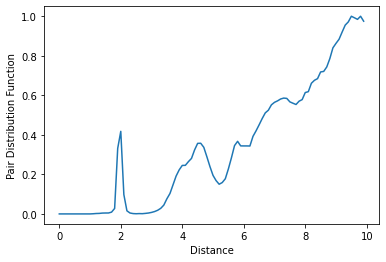

In [92]:

def compute_rdf(distances, r_max, dr):
    # 计算直方图
    hist, bin_edges = np.histogram(distances, bins=np.arange(0, r_max+dr, dr), density=False)

    # 归一化因子
    bin_widths = np.diff(bin_edges)
    norm = np.sum(hist) * bin_widths

    # 计算 RDF
    rdf = hist / norm

    return rdf, bin_edges[:-1]

# 示例数据 - 距离列表
distances = np.random.uniform(low=0, high=10, size=1000)

# 参数设置
r_max = 10.0  # 距离范围的最大值
dr = 0.1  # 距离间隔

# 缩放 RDF
rdf_scaled = rdf / np.max(rdf)

# 绘制配对分布函数
plt.plot(bin_edges, rdf_scaled)
plt.xlabel("Distance")
plt.ylabel("Pair Distribution Function")
plt.show()


C:\Users\zhang\AppData\Local\Temp\ipykernel_11664\511675454.py:15: RuntimeWarning: divide by zero encountered in divide
  rdf = hist / (norm * len(coordinates))


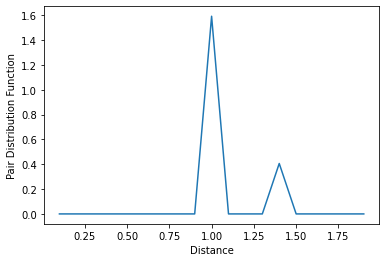

In [94]:
import numpy as np

def compute_rdf(coordinates, r_max, dr):
    # 计算距离矩阵
    distances = np.linalg.norm(coordinates[:, np.newaxis] - coordinates, axis=-1)

    # 计算直方图
    hist, bin_edges = np.histogram(distances, bins=np.arange(0, r_max+dr, dr), density=False)

    # 归一化因子
    bin_widths = np.diff(bin_edges)
    norm = 4 * np.pi * bin_edges[:-1]**2 * bin_widths

    # 计算 RDF
    rdf = hist / (norm * len(coordinates))

    return rdf, bin_edges[:-1]

# 示例数据 - 原子坐标
coordinates = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0]])

# 参数设置
r_max = 2.0  # 距离范围的最大值
dr = 0.1  # 距离间隔

# 计算 RDF
rdf, bin_edges = compute_rdf(coordinates, r_max, dr)

# 绘制配对分布函数
plt.plot(bin_edges, rdf)
plt.xlabel("Distance")
plt.ylabel("Pair Distribution Function")
plt.show()